### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t', index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [4]:
df.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [7]:
df.nunique()

urlDrugName           502
rating                 10
effectiveness           5
sideEffects             5
condition            1426
benefitsReview       3032
sideEffectsReview    2814
commentsReview       3047
dtype: int64

In [8]:
df.rating.unique()

array([ 4,  1, 10,  3,  2,  9,  7,  8,  6,  5], dtype=int64)

In [9]:
df.effectiveness.unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [10]:
df.sideEffects.unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [13]:
df = df[["rating", "effectiveness", "sideEffects"]]

In [14]:
df

,rating,effectiveness,sideEffects
2202,4,Highly Effective,Mild Side Effects
3117,1,Highly Effective,Severe Side Effects
1146,10,Highly Effective,No Side Effects
3947,3,Marginally Effective,Mild Side Effects
1951,2,Marginally Effective,Severe Side Effects
...,...,...,...
1039,10,Highly Effective,Mild Side Effects
3281,1,Ineffective,Extremely Severe Side Effects
1664,2,Marginally Effective,Moderate Side Effects
2621,8,Considerably Effective,Mild Side Effects


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [20]:
df = pd.get_dummies(data=df, columns=["effectiveness", "sideEffects"])

In [21]:
df.head()

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,4,0,1,0,0,0,0,1,0,0,0
3117,1,0,1,0,0,0,0,0,0,0,1
1146,10,0,1,0,0,0,0,0,0,1,0
3947,3,0,0,0,1,0,0,1,0,0,0
1951,2,0,0,0,1,0,0,0,0,0,1


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
seed = 2023

In [34]:
for k in range(2,21):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    kmeans.fit(df)
    labels = kmeans.labels_
    score = silhouette_score(df,labels)
    print(f"K = {k}, silhouette score = {score}")


K = 2, silhouette score = 0.6055089618561077
K = 3, silhouette score = 0.4381585450078779
K = 4, silhouette score = 0.39705280988017827
K = 5, silhouette score = 0.35632018427663514
K = 6, silhouette score = 0.35346551952374916
K = 7, silhouette score = 0.3762534131169205
K = 8, silhouette score = 0.42013439198877733
K = 9, silhouette score = 0.43397180104316296
K = 10, silhouette score = 0.4212447526220678
K = 11, silhouette score = 0.45637478081058674
K = 12, silhouette score = 0.43342185016954343
K = 13, silhouette score = 0.4602584666090989
K = 14, silhouette score = 0.4786056772236951
K = 15, silhouette score = 0.45919168203814625
K = 16, silhouette score = 0.4657443258214647
K = 17, silhouette score = 0.5004071027533769
K = 18, silhouette score = 0.49977310520943363
K = 19, silhouette score = 0.517624537996814
K = 20, silhouette score = 0.5267946938883822


#### Genera el K Means 

In [35]:
km = KMeans(n_clusters=2, random_state=seed)
km.fit(df)

KMeans(n_clusters=2, random_state=2023)

In [39]:
labels = km.labels_

In [37]:
km.predict(df)

array([0, 0, 1, ..., 0, 1, 0])

In [38]:
km.inertia_

9743.174036708004

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [40]:
import numpy as np

In [41]:
unique, counts = np.unique(labels, return_counts=True)

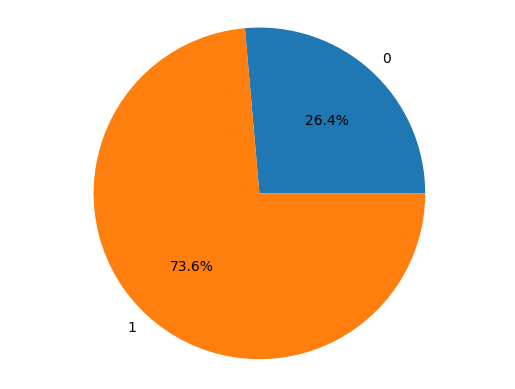

In [42]:
plt.pie(counts, labels=unique,autopct="%1.1f%%")
plt.axis("equal")
plt.show()